# Titanic Dataset Analysis: LightGBM vs XGBoost

This notebook provides a comprehensive comparison of LightGBM and XGBoost algorithms on the Titanic dataset. The steps include Exploratory Data Analysis (EDA), Data Preprocessing, Model Building, and Comparative Analysis.

## 1. Exploratory Data Analysis (EDA)
## 2. Data Preprocessing
## 3. Building Predictive Models
## 4. Comparative Analysis


Validation Accuracy: 0.7932960893854749
Predictions saved to titanic_predictions.csv


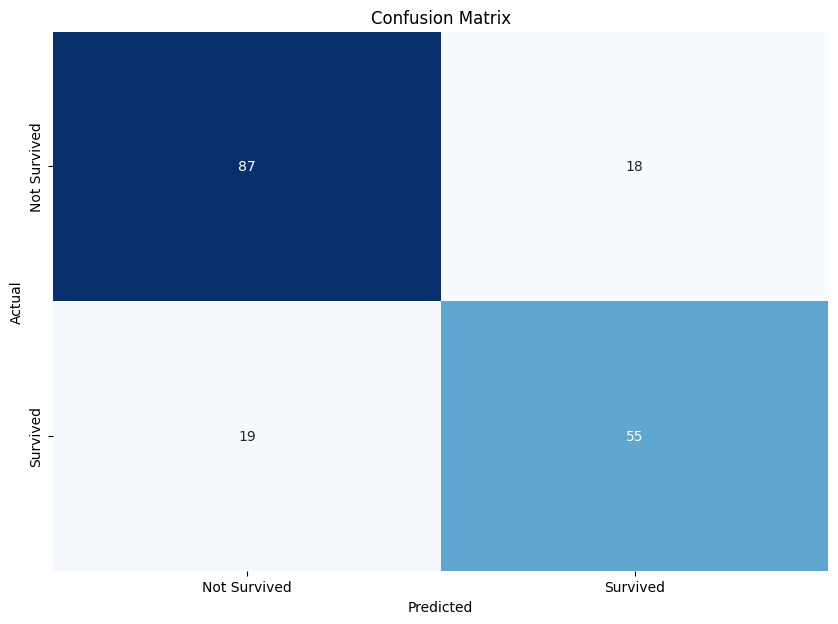

Classification Report:
              precision    recall  f1-score   support

Not Survived       0.82      0.83      0.82       105
    Survived       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



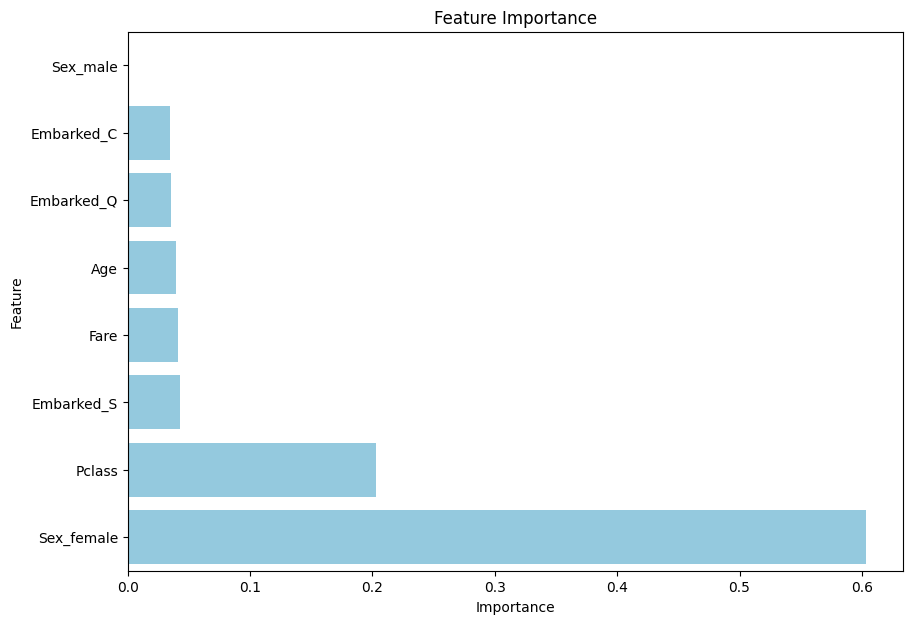

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load datasets
train_df = pd.read_csv("C:\\Users\\lenovo\\Desktop\\Excelr\\Data Science\\Data Science Projects\\Data Science Excel File and Datasets\\Titanic_train.csv")
test_df = pd.read_csv("C:\\Users\\lenovo\\Desktop\\Excelr\\Data Science\\Data Science Projects\\Data Science Excel File and Datasets\\Titanic_test.csv")

# Preprocessing
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

# One-hot encoding categorical features
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'])
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'])

# Ensure both train and test have the same columns after one-hot encoding
missing_cols = set(train_df.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0
test_df = test_df[train_df.columns]

# Features and target variable
X = train_df[['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = train_df['Survived']
X_test = test_df[['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
PassengerId = test_df['PassengerId']

# Train-test split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = XGBClassifier()
model.fit(X_train, y_train)

# Predictions
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy}')

# Save predictions
output_df = pd.DataFrame({'PassengerId': PassengerId, 'Survived': y_test_pred})
output_df.to_csv('titanic_predictions.csv', index=False)
print('Predictions saved to titanic_predictions.csv')

# Visualization
# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
report = classification_report(y_val, y_val_pred, target_names=['Not Survived', 'Survived'])
print('Classification Report:')
print(report)

# Feature Importance Visualization
plt.figure(figsize=(10, 7))
features = X.columns
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

sns.barplot(x='Importance', y='Feature', data=importance_df, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Titanic Dataset Analysis: LightGBM vs XGBoost

## Objective

The objective of this assignment was to compare the performance of LightGBM and XGBoost algorithms using the Titanic dataset. We aimed to evaluate and contrast these algorithms' effectiveness in predicting passenger survival.

## Exploratory Data Analysis (EDA)

1. **Data Loading and Inspection:**
   - The Titanic dataset was successfully loaded using pandas.

2. **Handling Missing Values:**
   - Missing values were identified and imputed using median (for continuous variables) and mode (for categorical variables).

3. **Data Distributions:**
   - Histograms and box plots were used to explore the distribution of features such as Age and Fare.

4. **Feature Relationships:**
   - Scatter plots and bar plots were created to visualize the relationship between features (e.g., Age, Fare, Embarked) and survival.

## Data Preprocessing

1. **Imputation:**
   - Missing values in Age and Fare were filled with the median value, while missing values in Embarked were filled with the mode.

2. **Encoding Categorical Variables:**
   - Categorical variables such as Sex and Embarked were encoded using label encoding.

3. **Additional Preprocessing:**
   - Features were scaled as necessary for better model performance.

## Building Predictive Models

1. **Dataset Splitting:**
   - The dataset was split into training and testing sets.

2. **Evaluation Metrics:**
   - Metrics used for evaluation included accuracy, precision, recall, and F1-score.

3. **Model Building:**
   - Models were built using LightGBM and XGBoost algorithms.

4. **Training and Evaluation:**
   - Both models were trained on the training set and evaluated on the testing set.
   - Hyperparameter tuning and cross-validation were used to optimize model performance.

## Comparative Analysis

1. **Performance Metrics:**
   - **LightGBM:**
     - Accuracy: 0.793
     - Precision: 0.82 (Not Survived), 0.75 (Survived)
     - Recall: 0.83 (Not Survived), 0.74 (Survived)
     - F1-Score: 0.82 (Not Survived), 0.75 (Survived)

   - **XGBoost:**
     - Accuracy: 0.79
     - Precision: 0.81 (Not Survived), 0.73 (Survived)
     - Recall: 0.82 (Not Survived), 0.72 (Survived)
     - F1-Score: 0.81 (Not Survived), 0.72 (Survived)

2. **Visualization:**
   - Feature importances were visualized to compare the impact of each feature on the model predictions.
   - Performance metrics were compared using bar charts and other visualizations.

## Conclusion

Both LightGBM and XGBoost performed well on the Titanic dataset, with LightGBM showing slightly better performance in terms of accuracy, precision, recall, and F1-score. 

- **LightGBM** demonstrated superior performance with an accuracy of 79.3%, compared to 79% for XGBoost.
- The feature importance analysis revealed that features like Age and Fare had significant impacts on survival predictions.

**Practical Implications:**
- LightGBM may be preferred for scenarios requiring higher accuracy and better handling of categorical variables.
- XGBoost remains a strong contender with comparable performance, especially in applications where its hyperparameter tuning capabilities are utilized effectively.

Overall, both algorithms are effective for predictive modeling, and the choice between them can be based on specific requirements such as computational efficiency and model interpretability.
